In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import astropy.table as aTable
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt

sys.path.append('../')

from BGS import BGS
from COSMOS import COSMOS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel
from Fileh5 import Fileh5

In [2]:
def smf_single_schechter_sty(x, z, a0, a1, a2, a3):
    logM = a0 + a1 * z
    alpha1 = a2 + a3 * z
    
    term0 = np.exp(-10 ** (x-logM))
    term1 = 10 ** ((alpha1+1)*(x - logM))
    return term0 * term1


def smf_single_schechter_integral(x, z, a0, a1, a2, a3):
    logM = a0 + a1*z
    alpha1 = a2 + a3*z
    term0 = np.exp(-10 ** (x-logM))
    term1 = 10 ** ((alpha1+1)*(x - logM))
    return term0 * term1


def mass_completeness_limit(z):
    
    x_values = [0.175, 0.5, 0.8, 1.125, 1.525, 2.0, 2.5, 3.125, 3.75, 4.4]
    y_values = [8.1, 8.7, 9.1, 9.3, 9.7, 9.9, 10.0, 10.1, 10.1,10.1]

    f = interp1d(x_values, y_values)
    return f(z)



def gathering_data(data, zmin, zmax):

    cosmos = data
    mask_zlim = (cosmos['ZPDF'].data > zmin) & (cosmos['ZPDF'].data < zmax)
    
    z_tot = cosmos['ZPDF'].data[mask_zlim]
    x_tot = cosmos['MASS_MED'].data[mask_zlim]
    
    
    mass_comp_lim = mass_completeness_limit(z_tot)
    # mask_mlim = []
    # for i in range(len(x_median_tot)):
    #     mask_mlim.append(x_median_tot[i] > mass_comp_lim[i])
    mask_mlim = x_tot > mass_completeness_limit(z_tot)
        
    
    mask = (mask_mlim)
    
    z = z_tot[mask].astype(np.float32)
    x = x_tot[mask].astype(np.float32)
    
    return z, x



def log_likelihood(a0, a1, a2, a3, z, x):
    q = smf_single_schechter_sty(x, z, a0, a1, a2, a3)

    mlim = mass_completeness_limit(z)
    I = [integrate.quad(smf_single_schechter_integral, mlim[i], 13., args=(z[i], a0, a1, a2, a3))[0] for i in range(z.shape[0])]

    a = np.log10(q) - np.log10(I)
    
    return a

In [26]:
data = aTable.Table.read('../data/COSMOS2015_Laigle+_v1.1.lite.hdf5')
z, x = gathering_data(data, 0.7, 1.0)

In [27]:
mask = (x > 12.5)
xx = x[mask]
zz = z[mask]

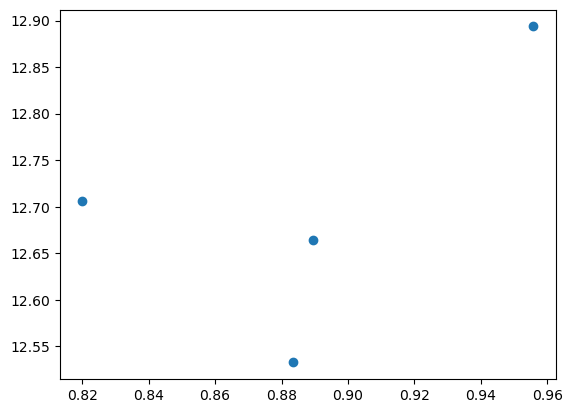

In [28]:
plt.plot(zz,xx, 'o')

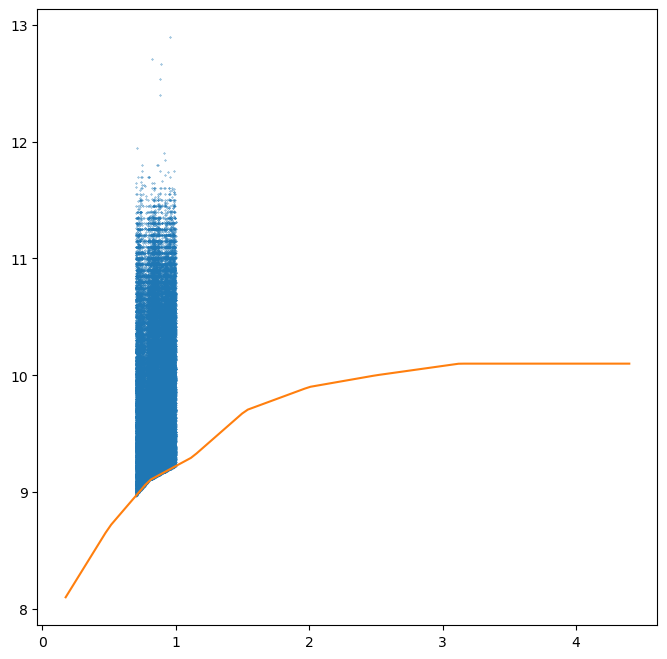

In [29]:
plt.figure(figsize=(8,8))
plt.plot(z, x, 'o', markersize=0.3)
plt.plot(np.linspace(0.175, 4.4, 100), mass_completeness_limit(np.linspace(0.175, 4.4, 100)))

In [23]:
mass_completeness_limit(zz[-1])

array(9.11230769)

In [33]:
a0, a1, a2, a3 = 10.,  0., -0.27799601,  0.

In [32]:
log_likelihood(a0, a1, a2, a3, z, x)

/var/folders/7q/qq4djnwd45n6znblnxh0t64m0000gn/T/ipykernel_16420/3190872740.py:59: RuntimeWarning: divide by zero encountered in log10
  a = np.log10(q) - np.log10(I)


array([-0.46104084, -0.64645796, -0.18337395, ..., -0.55607724,
       -0.12265832, -0.42294498])

In [ ]:
integrate.quad(smf_single_schechter_integral,
               mass_completeness_limit(zz[-1]), 13., args=(zz[-1], a0, a1, a2, a3))[0]

In [ ]:
smf_single_schechter_sty(xx, zz, a0, a1, a2, a3)

In [ ]:
def smf_single_schechter_sty_noz(x, z, a0, a1, a2, a3):
    logM = 10.
    alpha1 = -.2
    
    term0 = np.exp(-10 ** (x-logM))
    term1 = 10 ** ((alpha1+1)*(x - logM))
    return term0 * term1

In [ ]:
smf_single_schechter_sty_noz(xx, zz, a0, a1, a2, a3)

----

In [ ]:
cosmos = COSMOS('COSMOS2015_Laigle+_v1.1.lite.hdf5')
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5')

emcee_file = Fileh5(folder='emcee_runs', info_file='0.175_2.0')

emcee_run = EmceeRun(emcee_file)

In [ ]:
plotter = Plotter(bgs, emcee_run)

In [ ]:
plotter.plot_emcee_samples()

In [ ]:
samples = plotter.samples

In [ ]:
samples.shape

In [ ]:
samples[54,:,:]

In [ ]:
plotter02.plot_emcee_samples()

In [ ]:
plotter03.plot_emcee_samples()

In [ ]:
plotter04.plot_emcee_samples()

In [ ]:
emcee_run_02.set_best_params(discard=150)
emcee_run_03.set_best_params(discard=150)
emcee_run_04.set_best_params(discard=150)

In [ ]:
Plotter.plot_emcee_corner(emcee_run_02.flat_samples, emcee_run_02.labels4)

In [ ]:
Plotter.plot_emcee_corner(emcee_run_03.flat_samples, emcee_run_03.labels4)

In [ ]:
Plotter.plot_emcee_corner(emcee_run_04.flat_samples, emcee_run_04.labels4)

In [ ]:
z = np.linspace(0.01,1,5)

best_params02 = emcee_run_02.get_best_params()
best_params03 = emcee_run_03.get_best_params()
best_params04 = emcee_run_04.get_best_params()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(z, best_params02[0] + best_params02[1]*z, label=r'up to $z=0.2$')
plt.plot(z, best_params03[0] + best_params03[1]*z, label=r'up to $z=0.3$')
plt.plot(z, best_params04[0] + best_params04[1]*z, label='up to $z=0.4$')
plt.xlim(0,0.41)
plt.ylim(9.5, 13.)
plt.ylabel(r'$\log(M_{*})$')
plt.xlabel('$z$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(z, best_params02[2] + best_params02[3]*z, label=r'up to $z=0.2$')
plt.plot(z, best_params03[2] + best_params03[3]*z, label=r'up to $z=0.3$')
plt.plot(z, best_params04[2] + best_params04[3]*z, label='up to $z=0.4$')
plt.xlim(0,0.41)
plt.ylim(-5,5)
plt.ylabel(r'$\alpha_{1}$')
plt.xlabel('$z$')
plt.legend()

In [ ]:
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)

In [ ]:
zmins = np.array([0.01 + 0.04 * i for i in range(9)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(9)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,30))

plot_params_ext02 = {'color': 'blue', 'linestyle':'--', 'linewidth':0.7}
plot_params02 = {'color':'blue', 'linestyle':'-', 'label':'up to 0.2'}

plot_params_ext03 = {'color': 'orange', 'linestyle':'--', 'linewidth':0.7}
plot_params03 = {'color':'orange', 'linestyle':'-', 'label':'up to 0.3'}

plot_params_ext04 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7}
plot_params04 = {'color':'green', 'linestyle':'-', 'label':'up to 0.4'}


for i, zmin, zmax, z0 in zip(range(9), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(5,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n02 = z_smf.normalisation(best_params02)
    n03 = z_smf.normalisation(best_params03)
    n04 = z_smf.normalisation(best_params04)


    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

    # Plot histogram
    Plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
    
    # up to z = 0.2
    Plotter.plot_zschechter(x_lin, z0, n02, best_params02, **plot_params02)
    Plotter.plot_zschechter(x_lin_ext, z0, n02, best_params02, **plot_params_ext02)

    # up to z = 0.3
    Plotter.plot_zschechter(x_lin, z0, n03, best_params03, **plot_params03)
    Plotter.plot_zschechter(x_lin_ext, z0, n03, best_params03, **plot_params_ext03)

    # up to z = 0.4
    Plotter.plot_zschechter(x_lin, z0, n04, best_params04, **plot_params04)
    Plotter.plot_zschechter(x_lin_ext, z0, n04, best_params04, **plot_params_ext04)


    # inds = np.random.randint(len(emcee_run.flat_samples), size=100)
    # for ind in inds:
    #     z_smf_err = ZSchechterModel(bgs, zmin, zmax, z0)
    
    #     n_err = z_smf_err.normalisation(emcee_run.flat_samples[ind])
    #     Plotter.plot_zschechter(x_lin_ext, z0, n_err, emcee_run.flat_samples[ind], **{'alpha':0.2})

    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    